#Understanding Gated Recurrent Unit (GRU) in Deep Learning

**What is Gated Recurrent Unit(GRU) ?**

GRU stands for Gated Recurrent Unit, which is a type of recurrent neural network (RNN) architecture that is similar to LSTM (Long Short-Term Memory).

Gated Recurrent Units (GRUs) are a type of recurrent neural network (RNN) that are commonly used in natural language processing (NLP) and time series prediction tasks. They address some of the limitations of traditional RNNs, particularly the issue of vanishing gradients, by using gating mechanisms to control the flow of information.

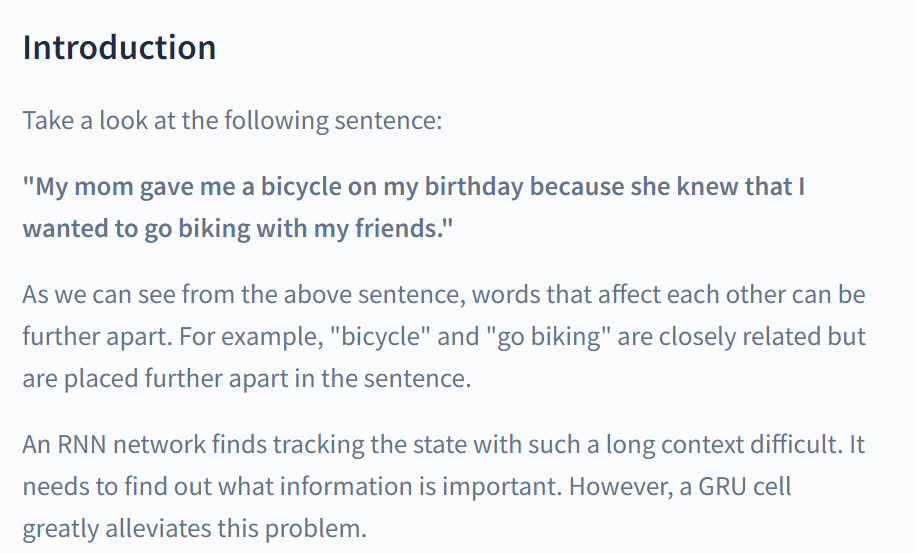

GRU network was invented in 2014.

It solves problems involving long sequences with contexts placed further apart, like the above biking example.

This is possible because of how the GRU cell in the GRU architecture is buil

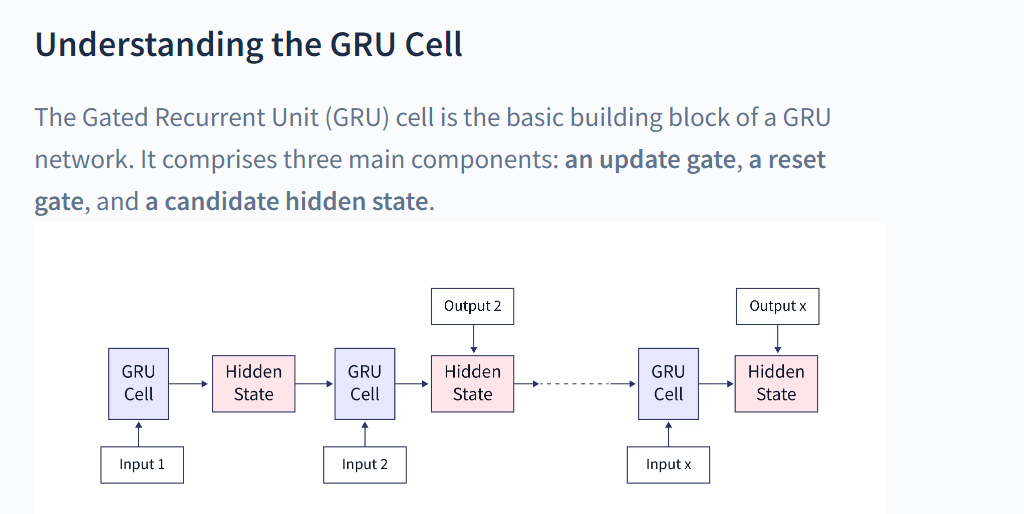

**Key Concepts of GRU**

**GRUs have two main gates:**

**Update Gate:** Decides how much of the past information needs to be passed along to the future.

**Reset Gate:** Decides how much of the past information to forget.

**The Architecture of GRU**


**As shown below, a GRU cell takes two inputs:**

* The previous hidden state
* The input in the current timestamp.



The cell combines these and passes them through the update and reset gates.

To get the output in the current timestep, we must pass this hidden state through a dense layer with softmax activation to predict the output.

Doing so, a new hidden state is obtained and then passed on to the next time step.

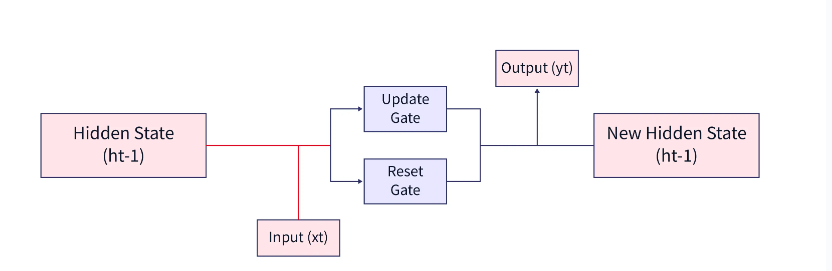

#Update gate


 determines what current GRU cell will pass information to the next GRU cell. It helps in keeping track of the most important information.

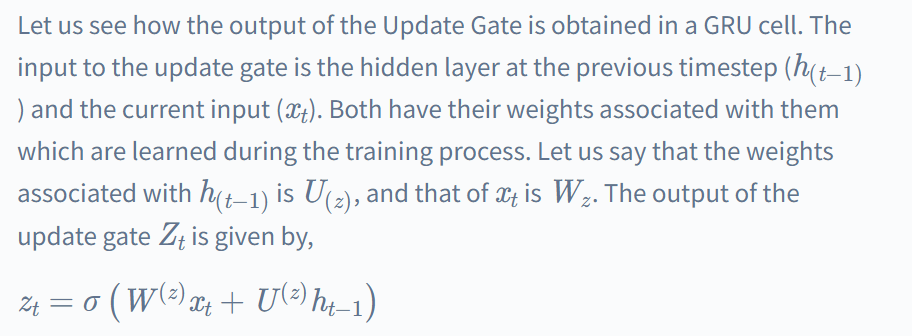

#Reset gate


A reset gate identifies the unnecessary information and decides what information to be laid off from the GRU network. Simply put, it decides what information to delete at the specific timestamp.

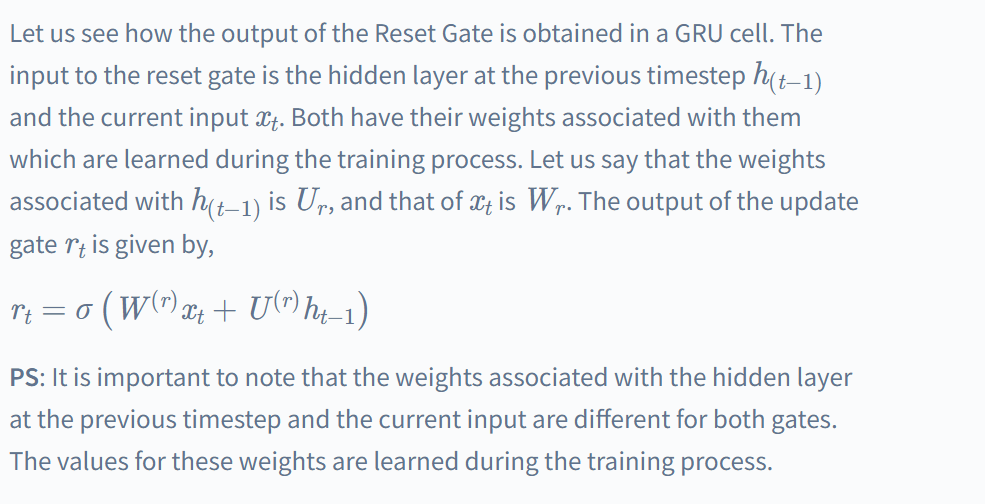

**How Does GRU Work?**

Gated Recurrent Unit (GRU) networks process sequential data, such as time series or natural language, bypassing the hidden state from one time step to the next. The hidden state is a vector that captures the information from the past time steps relevant to the current time step. The main idea behind a GRU is to allow the network to decide what information from the last time step is relevant to the current time step and what information can be discarded.

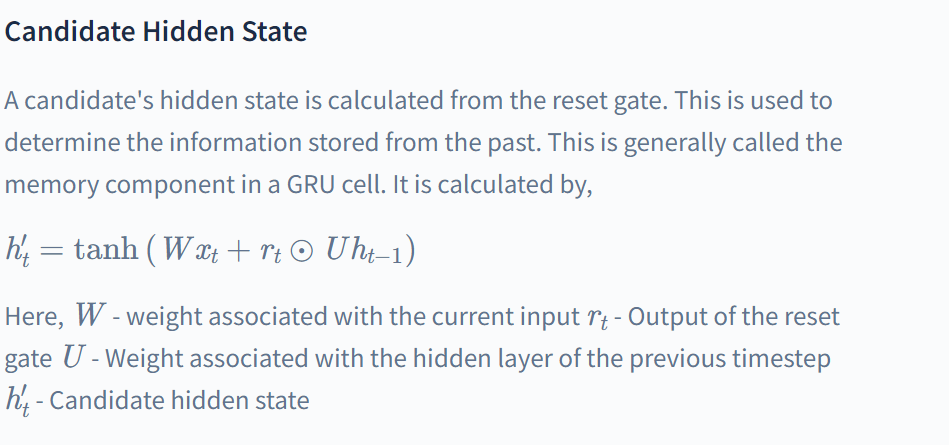

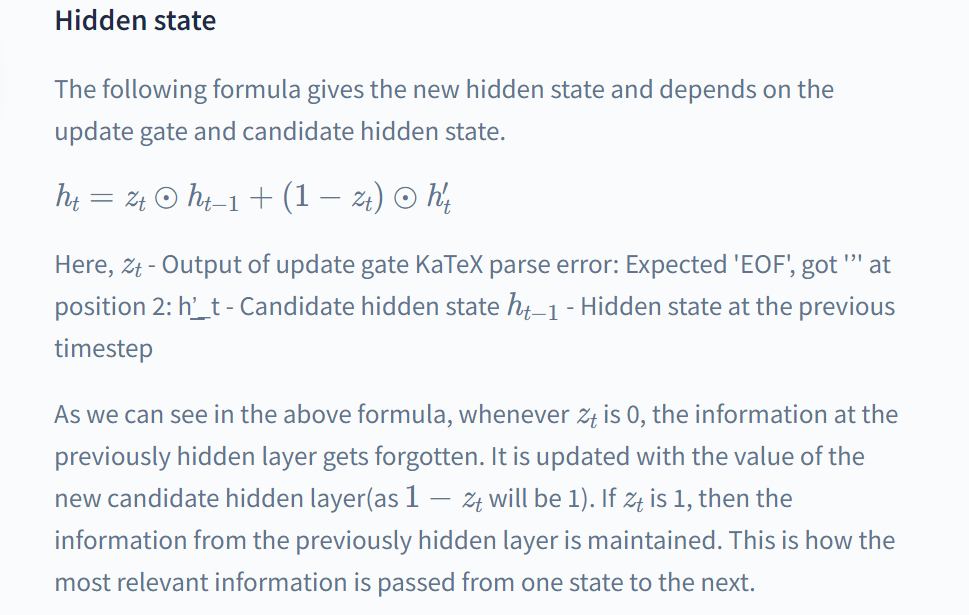

#Forward Propagation in a GRU Cell


Calculate the output of the update gate using the update gate formula:

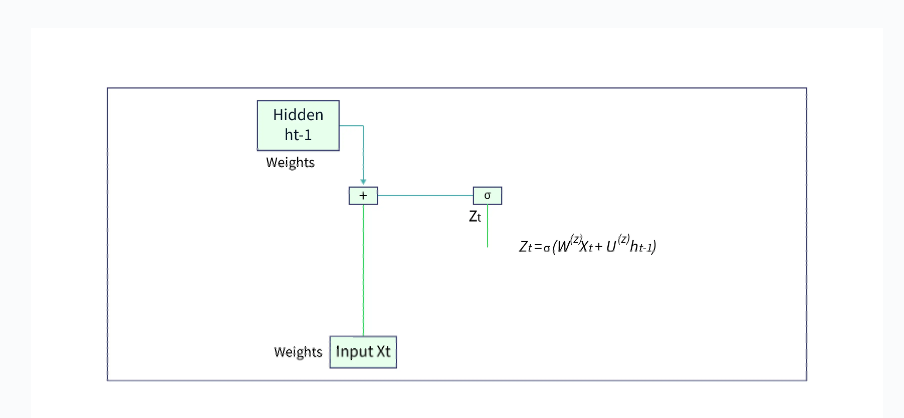

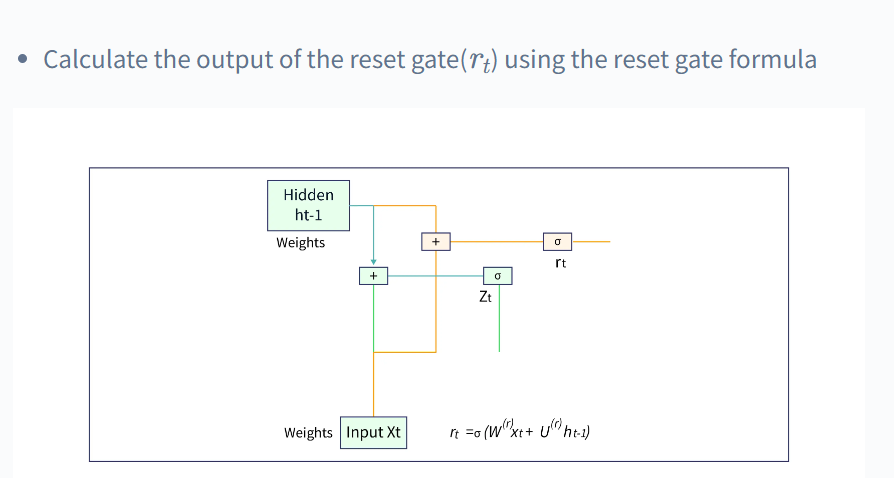

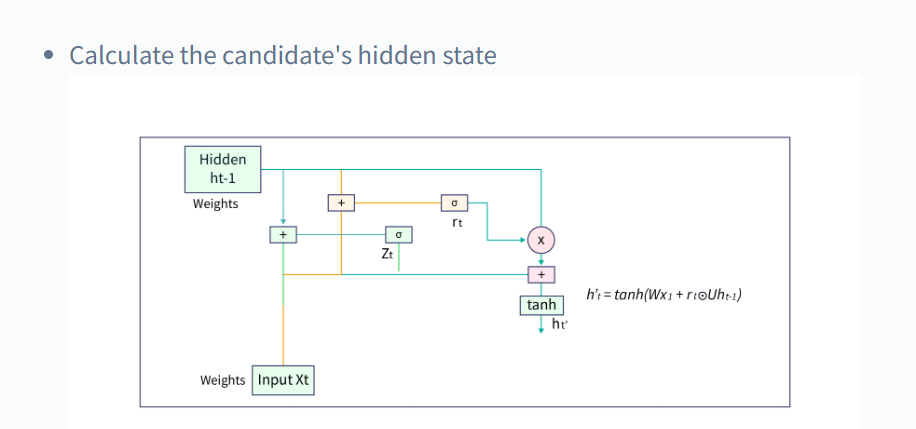

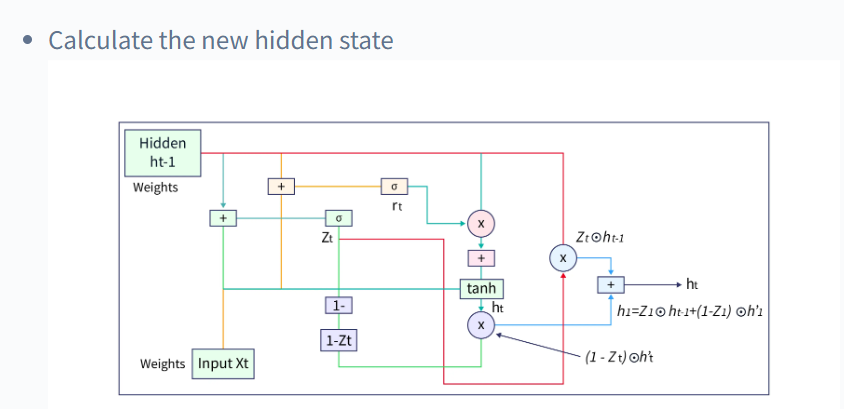

This is how forward propagation happens in a GRU cell at a GRU network.

We have a question about how the weights are learnt in a GRU network to make the right prediction. Let's understand that in the next section.

#Backpropagation in a GRU Cell
Take a look at the image below. Let each hidden layer(orange colour) represent a GRU cell.

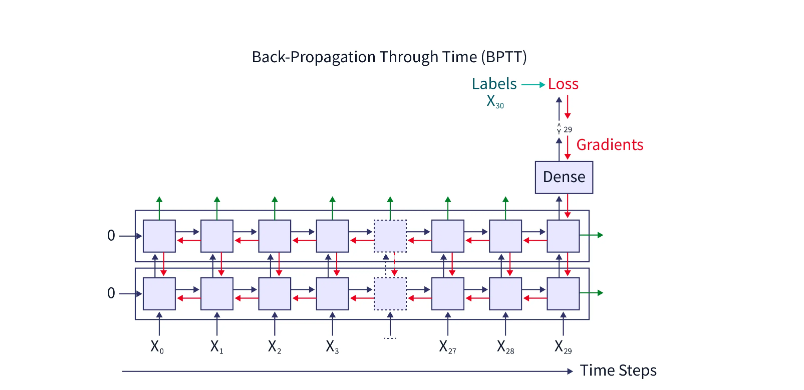

In the above image, we can see that whenever the network predicts wrongly, the network compares it with the original label, and the loss is then propagated throughout the network. This happens until all the weights' values are identified so that the value of the loss function used to compute the loss is minimum. During this time, the weights and biases associated with the hidden layers and the input are fine-tuned.

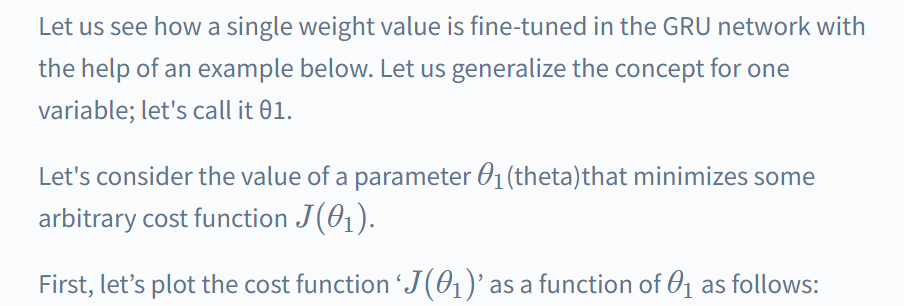

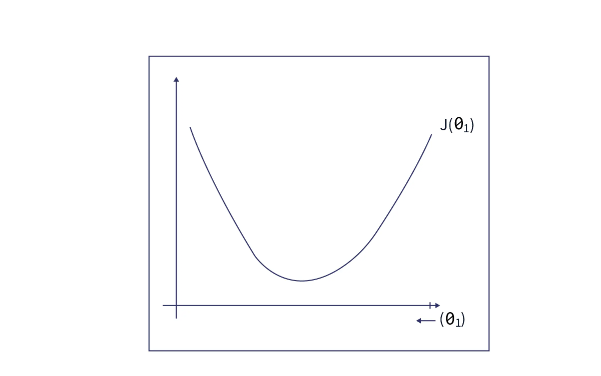

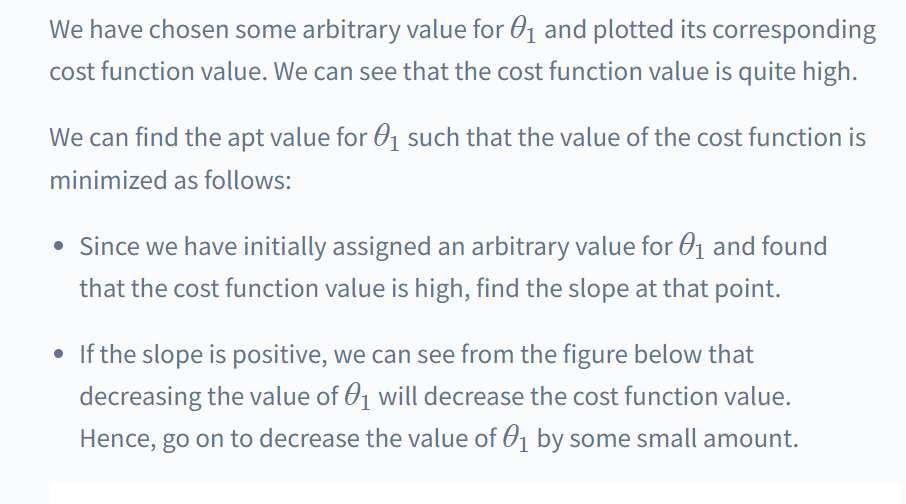

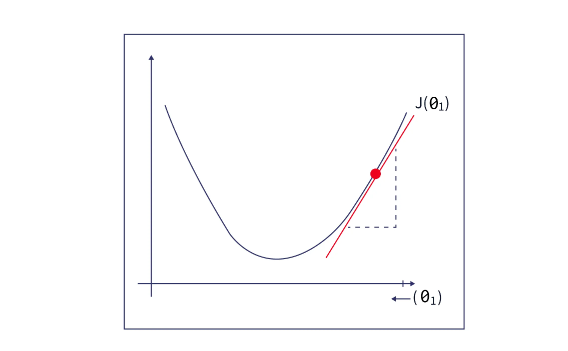

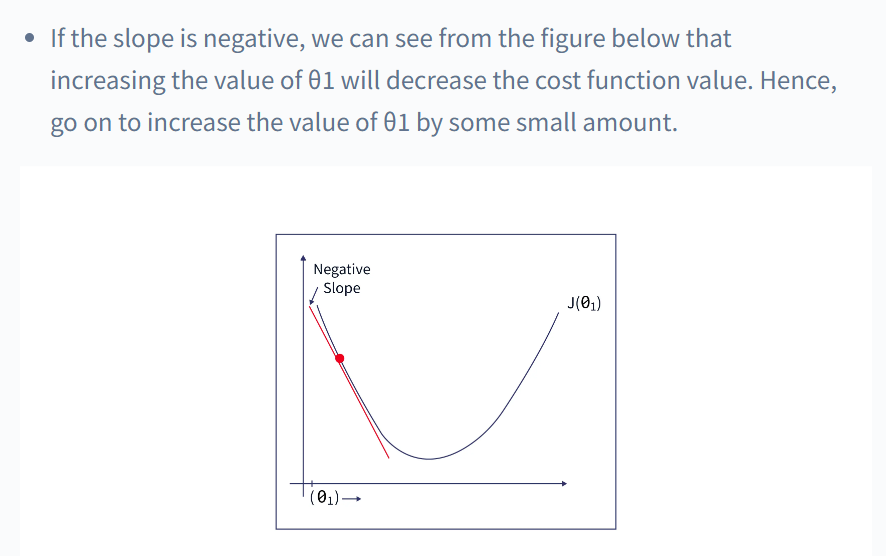

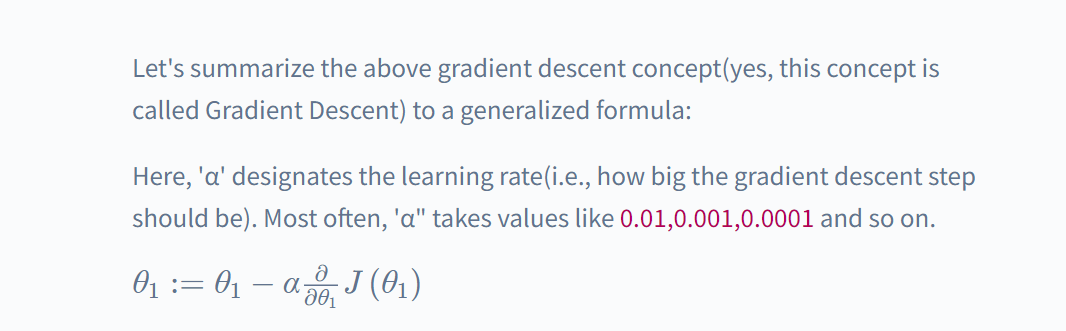

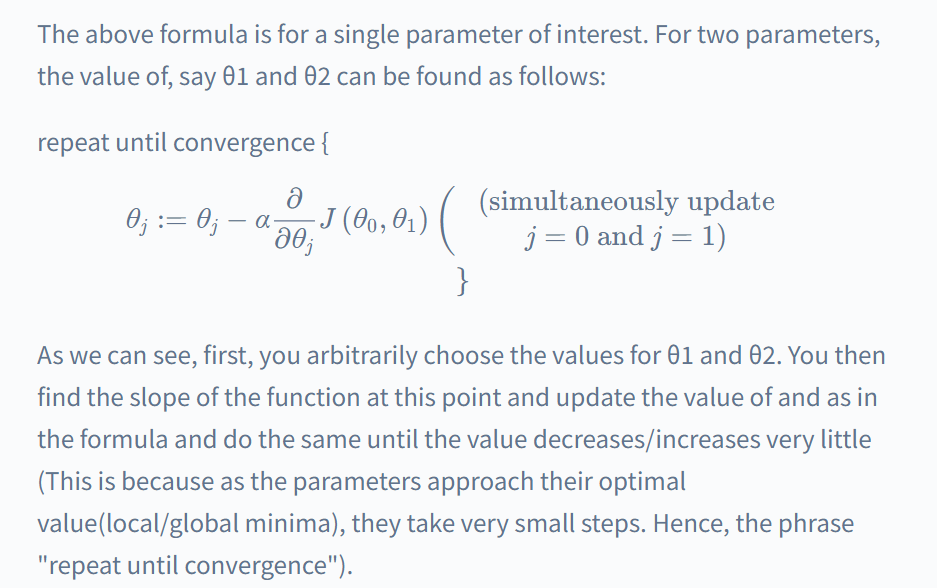

#Applicataion of GRU
**1. Natural Language Processing (NLP)**

GRUs are commonly used in NLP tasks because of their ability to handle sequential data effectively. Some applications include:

**Language Modeling:** Predicting the next word in a sequence, which is useful for text generation and autocomplete features.

**Machine Translation:** Translating text from one language to another.

**Speech Recognition:** Converting spoken language into text.

**Text Summarization:** Generating concise summaries of long texts.
Sentiment Analysis: Determining the sentiment expressed in a piece of text.

**2. Time Series Forecasting**
GRUs are effective in forecasting future values based on past time series data. Applications include:

**Stock Market Prediction:** Predicting future stock prices or trends.

**Weather Forecasting:** Predicting future weather conditions.

**Energy Consumption:** Forecasting future energy usage for better resource management.

**3. Anomaly Detection**
GRUs can be used to detect anomalies in sequential data, which is important in various domains:

**Network Security:** Identifying unusual patterns in network traffic that may indicate a cyber attack.

**Industrial Monitoring:** Detecting abnormal behavior in machinery to prevent failures.

**Healthcare**: Identifying unusual patterns in physiological signals that may indicate a health issue.

**4. Recommendation Systems**
GRUs can model user behavior over time, which is useful for building recommendation systems:

**Content Recommendation:** Suggesting articles, videos, or music based on user preferences and behavior.
Product Recommendation: Recommending products to users based on their browsing and purchase history.

**5. Robotics and Control Systems**
GRUs can be used to control systems that require understanding of sequential dependencies:

**Robotic Control:** Managing the movement and actions of robots.
Autonomous Vehicles: Helping in the navigation and control of self-driving cars.

**6. Healthcare**
GRUs can be applied to various healthcare tasks involving sequential data:

**Patient Monitoring:** Analyzing time-series data from patients (e.g., heart rate, blood pressure) to detect critical conditions.

**Disease Prediction:** Predicting the onset of diseases based on patient history.

**7. Finance**
GRUs can be used to model and predict financial time series data:

**Credit Scoring:** Predicting the creditworthiness of individuals based on their financial history.

**Fraud Detection:** Identifying fraudulent transactions by analyzing transaction patterns.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense


In [9]:
# Generate dummy sequential data
def generate_sequence(n_timesteps):
    X = np.random.randn(n_timesteps, 1) ## Random sequence with 1 feature
    y = np.random.randint(0, 2, size=(n_timesteps, 1)) # # Binary targets
    return X, y

n_timesteps = 100
X, y = generate_sequence(n_timesteps)

# Reshape data to (samples, timesteps, features)
X = X.reshape((1, n_timesteps, 1))
y = y.reshape((1, n_timesteps, 1))


In [8]:
model = Sequential()
#We have n_timesteps time steps in each sequence.
#We have 1 feature at each time step.
model.add(GRU(50, return_sequences=True, input_shape=(n_timesteps, 1)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')


In [5]:
model.fit(X, y, epochs=10, verbose=1)


Epoch 1/10
1/1 [==============================] - 0s 32ms/step - loss: 0.5556
Epoch 2/10
1/1 [==============================] - 0s 28ms/step - loss: 0.5520
Epoch 3/10
1/1 [==============================] - 0s 31ms/step - loss: 0.5489
Epoch 4/10
1/1 [==============================] - 0s 29ms/step - loss: 0.5462
Epoch 5/10
1/1 [==============================] - 0s 31ms/step - loss: 0.5436
Epoch 6/10
1/1 [==============================] - 0s 32ms/step - loss: 0.5405
Epoch 7/10
1/1 [==============================] - 0s 28ms/step - loss: 0.5371
Epoch 8/10
1/1 [==============================] - 0s 27ms/step - loss: 0.5336
Epoch 9/10
1/1 [==============================] - 0s 27ms/step - loss: 0.5305
Epoch 10/10
1/1 [==============================] - 0s 28ms/step - loss: 0.5294


In [6]:
predictions = model.predict(X)
print(predictions)

1/1 [==============================] - 0s 401ms/step
[[[0.48215428]
  [0.15609865]
  [0.3096859 ]
  [0.6318389 ]
  [0.5172387 ]
  [0.7535893 ]
  [0.6868229 ]
  [0.5260125 ]
  [0.35783374]
  [0.3731905 ]
  [0.3810385 ]
  [0.08656384]
  [0.16340111]
  [0.49501052]
  [0.66495985]
  [0.7670387 ]
  [0.7743415 ]
  [0.69380283]
  [0.6091015 ]
  [0.33385482]
  [0.5950544 ]
  [0.6898129 ]
  [0.562502  ]
  [0.40854317]
  [0.22577687]
  [0.25672838]
  [0.27878377]
  [0.3585164 ]
  [0.32851467]
  [0.42259187]
  [0.40678677]
  [0.22952822]
  [0.33752108]
  [0.6011688 ]
  [0.5108994 ]
  [0.7861028 ]
  [0.83824605]
  [0.8322557 ]
  [0.87894225]
  [0.93306684]
  [0.96472055]
  [0.9651375 ]
  [0.43213174]
  [0.1263709 ]
  [0.09589125]
  [0.05887409]
  [0.18383755]
  [0.27839816]
  [0.6453316 ]
  [0.19602387]
  [0.58355373]
  [0.7602143 ]
  [0.59929806]
  [0.44583017]
  [0.4108863 ]
  [0.44732794]
  [0.36228046]
  [0.2087161 ]
  [0.30251688]
  [0.39929703]
  [0.39823216]
  [0.10888658]
  [0.3344922 ]
  

The data in the example is synthetic and randomly generated for demonstration purposes. It doesn't represent any real-world phenomenon but serves to illustrate how to prepare and process sequential data for training a GRU model.

**Pros of GRUs**

**1.Efficiency:**

**Simpler Architecture:** GRUs have a simpler architecture compared to Long Short-Term Memory (LSTM) units, with fewer gates and parameters, which can lead to faster training and inference times.

**Fewer Parameters:** GRUs use fewer parameters than LSTMs because they combine the forget and input gates into a single update gate. This reduces the computational complexity.


**2.Effectiveness:**

**Handles Long-Term Dependencies:** Like LSTMs, GRUs can capture long-term dependencies in sequential data, which is a limitation of traditional RNNs.

**Prevents Vanishing Gradient:** GRUs use gating mechanisms to control the flow of information, which helps mitigate the vanishing gradient problem common in traditional RNNs.

**3.Versatility:**

**Wide Range of Applications:** GRUs can be applied to various tasks such as language modeling, machine translation, speech recognition, time series forecasting, and more.

**Good Performance on Small Datasets:** GRUs often perform well on smaller datasets due to their simpler structure and fewer parameters, which can reduce the risk of overfitting.

**4.Ease of Use:**

**Simpler Implementation:** The simpler structure of GRUs makes them easier to implement and tune compared to LSTMs, especially for those new to RNNs.

**Cons of GRUs**

**Less Powerful Than LSTMs:**

**Capacity:** While GRUs are effective in many scenarios, LSTMs may perform better on certain tasks due to their more complex architecture and additional gates, which can provide a higher capacity to learn intricate patterns.
Limited Research and Adoption:

**Less Mature:** LSTMs have been around longer and are more widely studied and adopted in various applications compared to GRUs. This can mean fewer resources and community support for GRUs in some cases.
May Not Always Be the Best Choice:

**Task-Specific Performance:** The performance of GRUs can vary depending on the specific task and dataset. In some cases, other architectures such as LSTMs or even Transformer models may outperform GRUs.
Not a One-Size-Fits-All Solution:

**Need for Experimentation:** Like any machine learning model, GRUs may require experimentation and tuning to achieve optimal performance on a given task. There is no guarantee that GRUs will outperform other models without careful tuning and validation.

**When to Use GRUs:**

When you need a simpler and more efficient alternative to LSTMs.

When working with smaller datasets where overfitting is a concern.

When you need to quickly prototype and experiment with sequential models.

In [10]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense,GRU,Flatten,LSTM
from keras.layers import Embedding
from keras.utils import pad_sequences


In [11]:
#Keeping only the top n words
word_count = 5000
(x_train, y_train), (x_test,y_test) = imdb.load_data(num_words = word_count)

#Taking the top 500 words
word_max = 500
x_train = pad_sequences(x_train, maxlen=word_max)
x_test =  pad_sequences(x_test, maxlen=word_max)


17464789/17464789 [==============================] - 0s 0us/step


In [12]:
model = Sequential()
model.add(Embedding(word_count,100,input_length=word_max))
model.add(GRU(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


print(model.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 100)          500000    
                                                                 
 gru_2 (GRU)                 (None, 100)               60600     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 560701 (2.14 MB)
Trainable params: 560701 (2.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [13]:

model.fit(x_train,y_train, epochs=3, batch_size=64)


Epoch 1/3
391/391 [==============================] - 289s 734ms/step - loss: 0.4430 - accuracy: 0.7875
Epoch 2/3
391/391 [==============================] - 286s 731ms/step - loss: 0.2717 - accuracy: 0.8897
Epoch 3/3
391/391 [==============================] - 286s 731ms/step - loss: 0.2216 - accuracy: 0.9127


In [14]:
y_predict = model.predict(x_test)
print(y_predict)


782/782 [==============================] - 65s 83ms/step
[[0.20757918]
 [0.9929437 ]
 [0.26042247]
 ...
 [0.03386623]
 [0.12918015]
 [0.95863485]]


In [15]:
result = model.evaluate(x_test,y_test, verbose=0)
print("Accuracy = %.2f%%" % (result[1]*100))


Accuracy = 88.28%
